#Analysis and modelling

Dataset has information about people and their diesease history. In this dataset 12 categorical and 7 numerical features are available to find wherther a person has cardiovascular disease or not. Its a classification problem where first we need to analyse the data and model the data.

In [1]:
#importing all neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("CVD_cleaned.csv")
df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


As per below information, its clear that dataset is clean and clear there is no nan values present in the data .

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [4]:
#to describe numerical data we use describe function
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


In [5]:
#Exclude='number' in describe will show all the categorical and top values
df.describe(exclude = 'number').T

,count,unique,top,freq
General_Health,308854,5,Very Good,110395
Checkup,308854,5,Within the past year,239371
Exercise,308854,2,Yes,239381
Heart_Disease,308854,2,No,283883
Skin_Cancer,308854,2,No,278860
Other_Cancer,308854,2,No,278976
Depression,308854,2,No,246953
Diabetes,308854,4,No,259141
Arthritis,308854,2,No,207783
Sex,308854,2,Female,160196


In [6]:
#numeric columns
numeric = df.columns[df.dtypes != object]
print(numeric)

Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')


In [7]:
numeric_data = df[numeric]
numeric_data

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...
308849,168.0,81.65,29.05,4.0,30.0,8.0,0.0
308850,180.0,69.85,21.48,8.0,15.0,60.0,4.0
308851,157.0,61.23,24.69,4.0,40.0,8.0,4.0
308852,183.0,79.38,23.73,3.0,30.0,12.0,0.0


##Analysis of Data

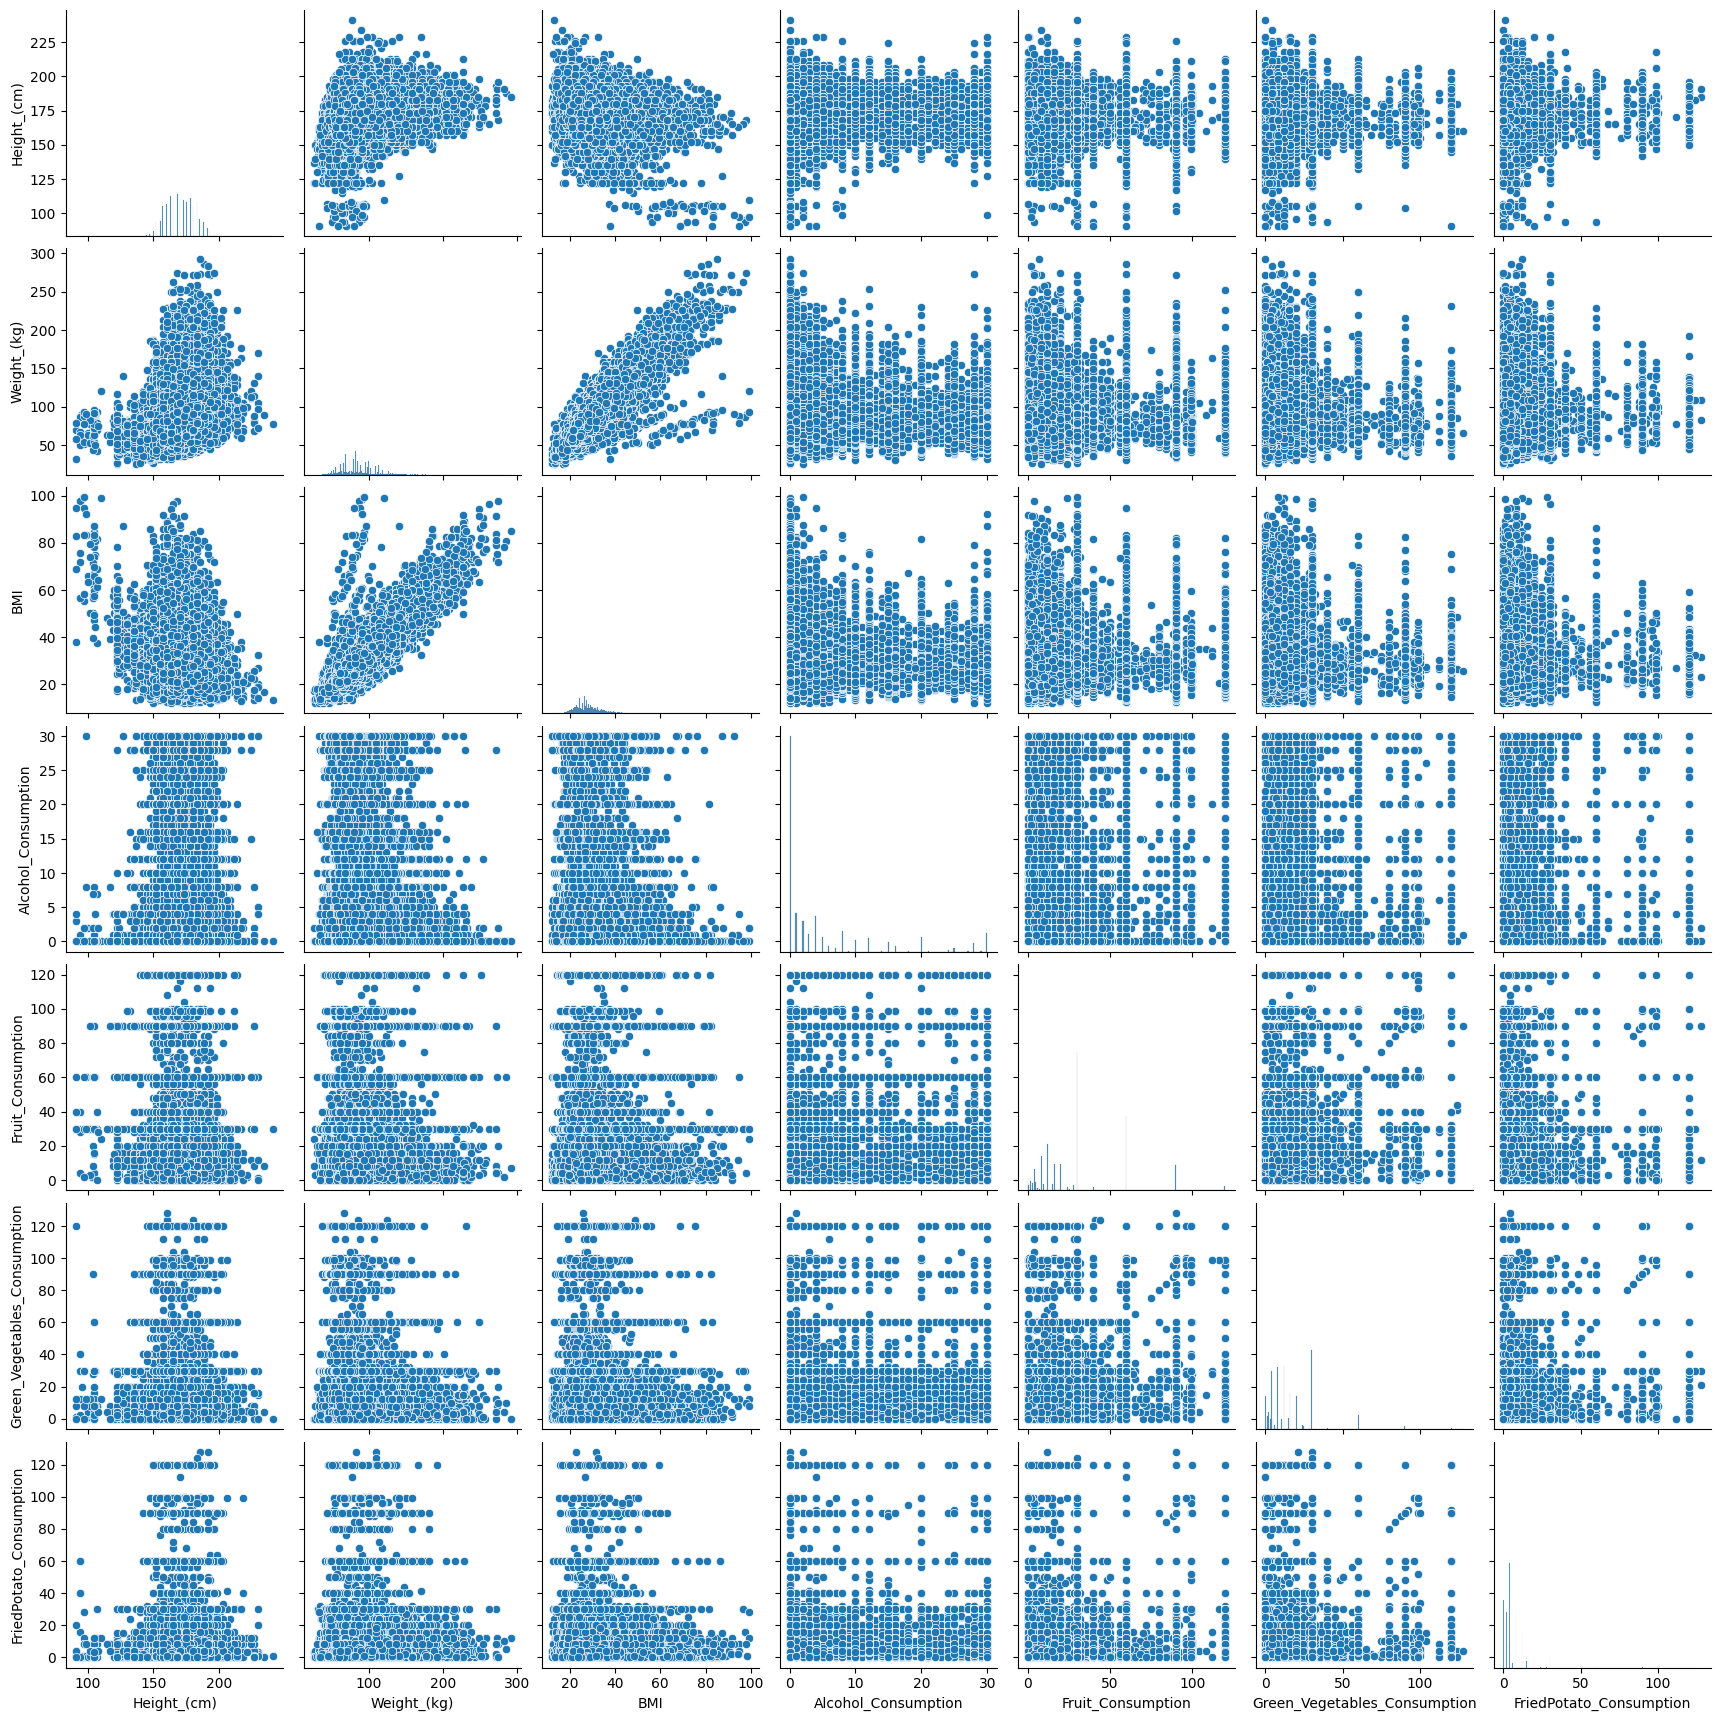

In [8]:
sns.pairplot(numeric_data)

Text(0.5, 1.0, 'Weight_(kg)')

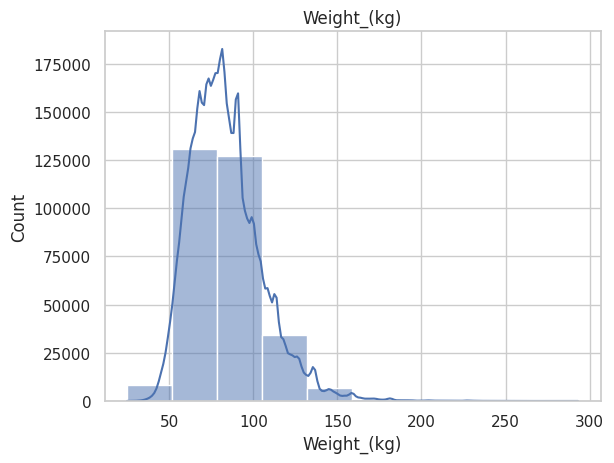

In [9]:
sns.set(style='whitegrid')
sns.histplot(numeric_data.iloc[:, 1], kde=True,bins = 10)
plt.title(numeric_data.columns[1])




Most of the persons weight is lies between 50-100 , few candidates are below 50 kg and some reasonable amount of people are there in above 100 category.

Text(0.5, 1.0, 'BMI')

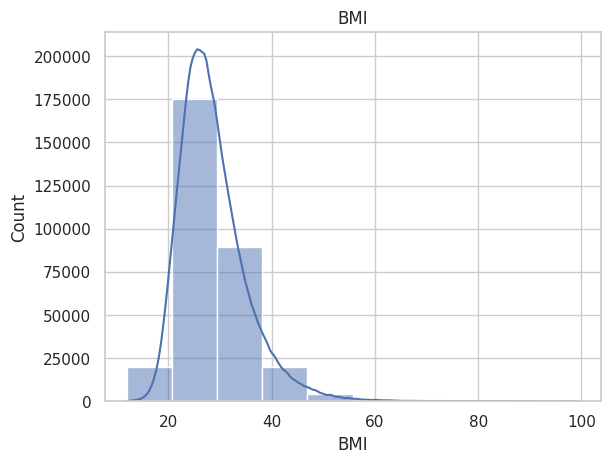

In [10]:
sns.set(style='whitegrid')
sns.histplot(numeric_data.iloc[:, 2], kde=True,bins = 10)
plt.title(numeric_data.columns[2])

The count of BMI more there in between 20 -40 . Normally BMI range from 18.5 to 25 considered as optimal range beyond this range is considered as over weight or below this range considered as underwight.

In [11]:
df['Alcohol_Consumption'].unique()


array([ 0.,  4.,  3.,  8., 30.,  2., 12.,  1.,  5., 10., 20., 17., 16.,
        6., 25., 28., 15.,  7.,  9., 24., 11., 29., 27., 14., 21., 23.,
       18., 26., 22., 13., 19.])

Text(0.5, 1.0, 'Alcohol_Consumption')

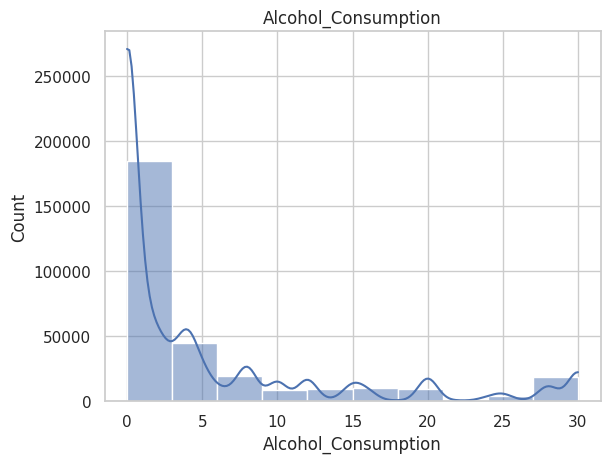

In [12]:
sns.set(style='whitegrid')
sns.histplot(numeric_data.iloc[:, 3], kde=True,bins = 10)
plt.title(numeric_data.columns[3])

Text(0.5, 1.0, 'Fruit_Consumption')

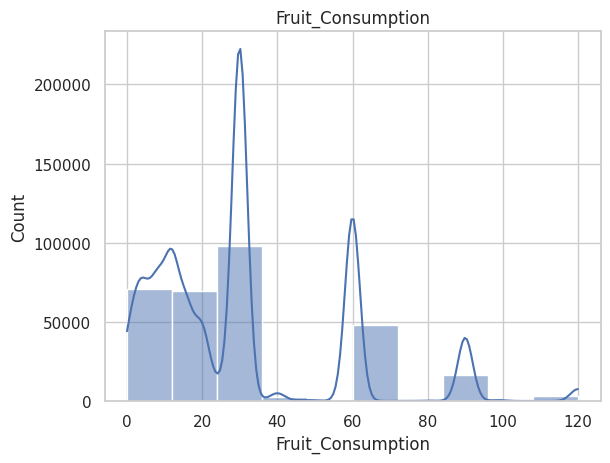

In [13]:
sns.set(style='whitegrid')
sns.histplot(numeric_data.iloc[:, 4], kde=True,bins = 10)
plt.title(numeric_data.columns[4])

Text(0.5, 1.0, 'Green_Vegetables_Consumption')

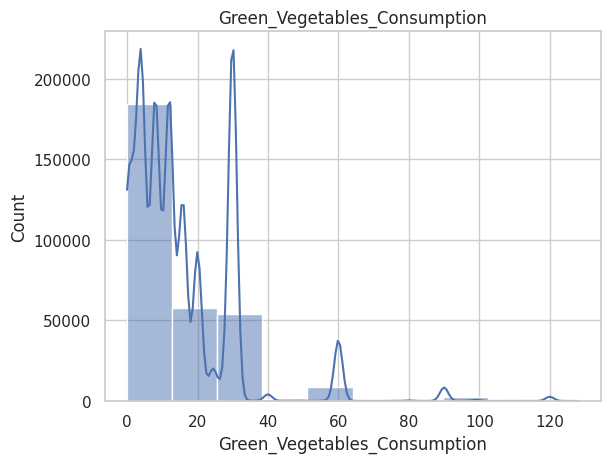

In [14]:
sns.set(style='whitegrid')
sns.histplot(numeric_data.iloc[:, 5], kde=True,bins = 10)
plt.title(numeric_data.columns[5])

Text(0.5, 1.0, 'FriedPotato_Consumption')

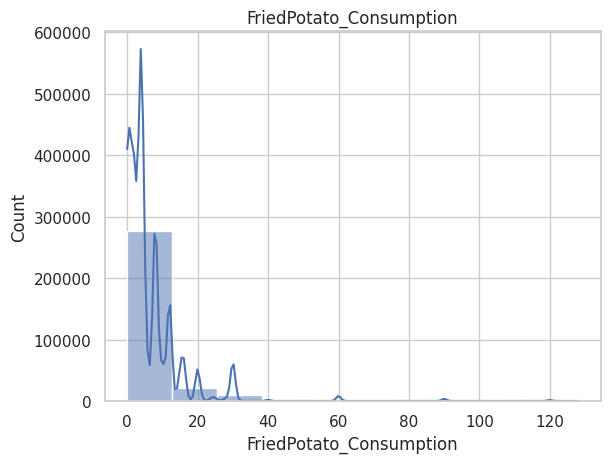

In [15]:
sns.set(style='whitegrid')
sns.histplot(numeric_data.iloc[:, 6], kde=True,bins = 10)
plt.title(numeric_data.columns[6])

Text(0.5, 1.0, 'Height_(cm)')

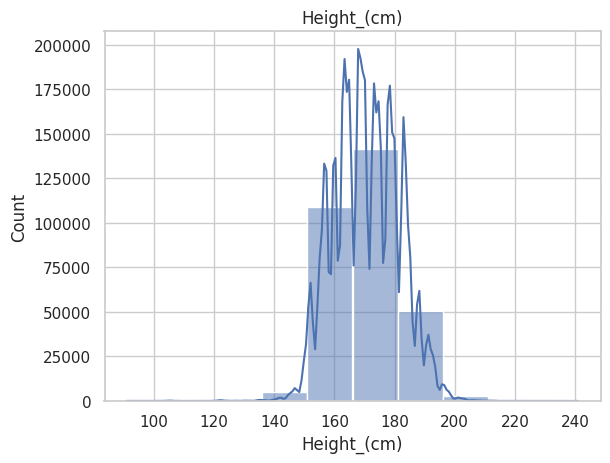

In [16]:
sns.set(style='whitegrid')
sns.histplot(numeric_data.iloc[:, 0], kde=True,bins = 10)
plt.title(numeric_data.columns[0])

In this data set the height almost looks like normal distribution. Most of the person are above 150-190 height.

In [17]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

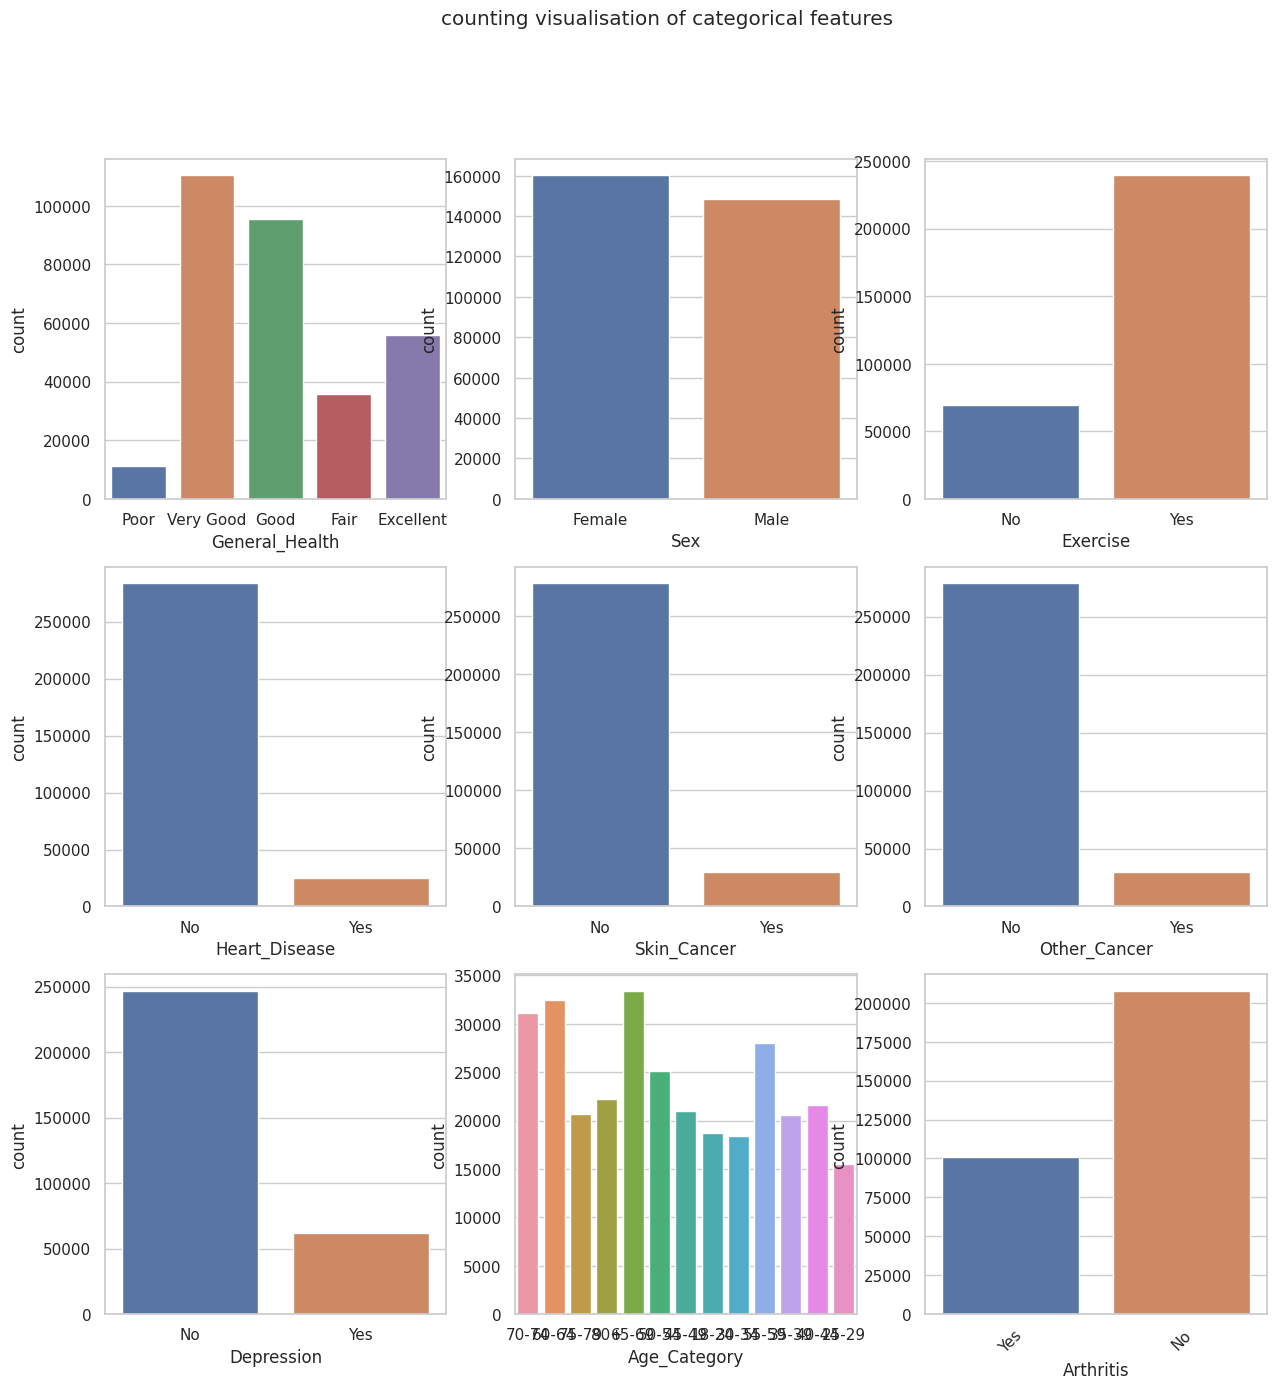

In [18]:
fig, axes = plt.subplots(3,3,figsize=(15,15))

fig .suptitle("counting visualisation of categorical features")
sns.countplot(ax=axes[0, 0], data=df, x='General_Health')
sns.countplot(ax=axes[0, 1], data=df, x='Sex')
sns.countplot(ax=axes[0,2], data=df, x='Exercise')
sns.countplot(ax=axes[1,0],data = df, x ='Heart_Disease' )
sns.countplot(ax=axes[1, 1], data=df, x='Skin_Cancer')
sns.countplot(ax=axes[1,2], data=df, x='Other_Cancer')
sns.countplot(ax=axes[2,0],data = df, x ='Depression' )
sns.countplot(ax=axes[2, 1], data=df, x='Age_Category')
sns.countplot(ax=axes[2, 2], data=df, x='Arthritis')

plt.xticks(rotation = 45)


Mostly people have very good and good heath as per general health condition

Female candidate are predominat in the data set

A substantial portion of the people are doing excercise

people prone to Skin and other cancer are less amount in the data.

Almost 100000 people are prone to arthritis out of 300000 data points


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Within the past 2 years'),
  Text(1, 0, 'Within the past year'),
  Text(2, 0, '5 or more years ago'),
  Text(3, 0, 'Within the past 5 years'),
  Text(4, 0, 'Never')])

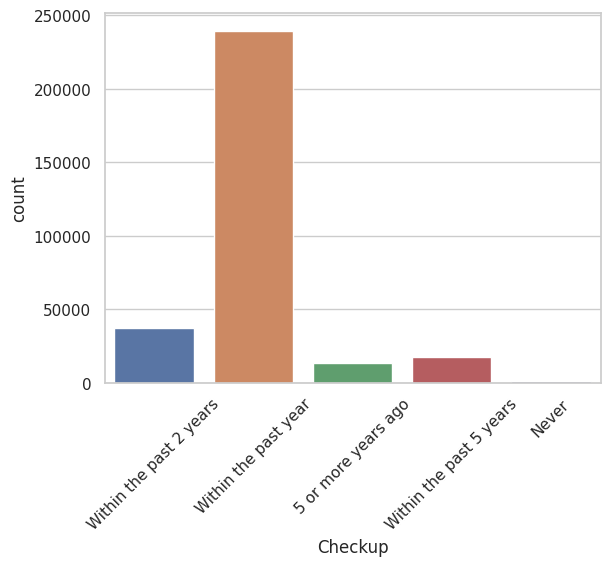

In [19]:
sns.countplot(x=df['Checkup'])
plt.xticks(rotation = 45)

As per this check-up feature dominant data have done their check-up within the past year.

Our major aim is to analyse which type of people are more prone to cardiovascular disease. So we need to analyse the independent variable and dependent variable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '18-24'),
  Text(1, 0, '25-29'),
  Text(2, 0, '30-34'),
  Text(3, 0, '35-39'),
  Text(4, 0, '40-44'),
  Text(5, 0, '45-49'),
  Text(6, 0, '50-54'),
  Text(7, 0, '55-59'),
  Text(8, 0, '60-64'),
  Text(9, 0, '65-69'),
  Text(10, 0, '70-74'),
  Text(11, 0, '75-79'),
  Text(12, 0, '80+')])

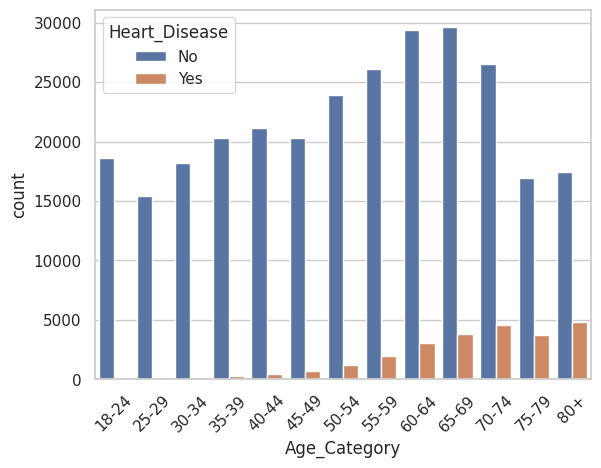

In [20]:
sns.countplot(x=df['Age_Category'].sort_values(), hue=df['Heart_Disease'])
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'No, pre-diabetes or borderline diabetes'),
  Text(2, 0, 'Yes'),
  Text(3, 0, 'Yes, but female told only during pregnancy')])

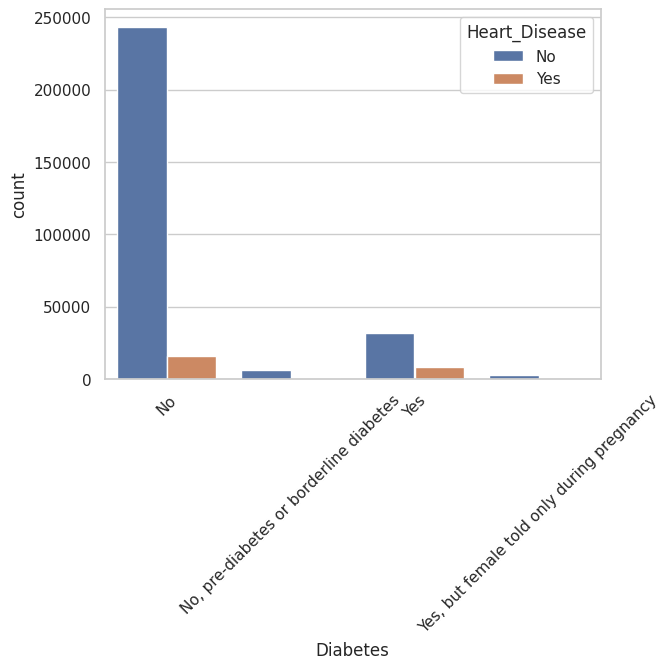

In [21]:
sns.countplot(x=df['Diabetes'].sort_values(), hue=df['Heart_Disease'])
plt.xticks(rotation = 45)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

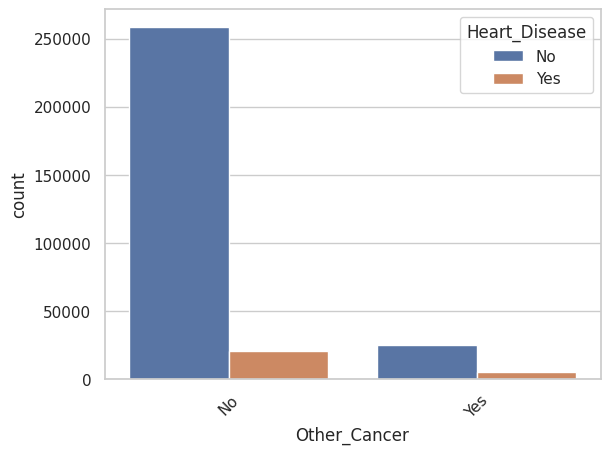

In [22]:
sns.countplot(x=df['Other_Cancer'].sort_values(), hue=df['Heart_Disease'])
plt.xticks(rotation = 45)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

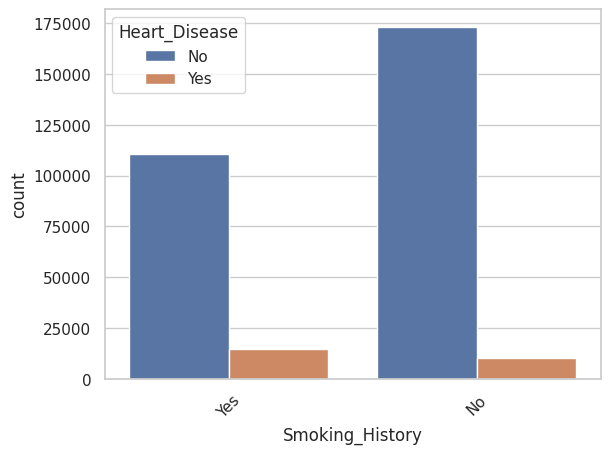

In [23]:
sns.countplot(x=df['Smoking_History'], hue=df['Heart_Disease'])
plt.xticks(rotation = 45)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

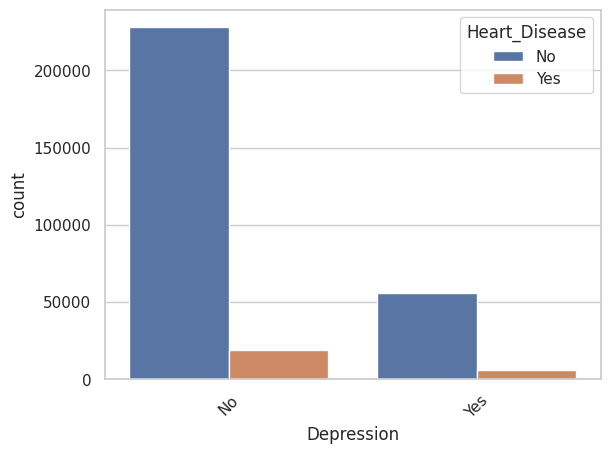

In [24]:
sns.countplot(x=df['Depression'], hue=df['Heart_Disease'])
plt.xticks(rotation = 45)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

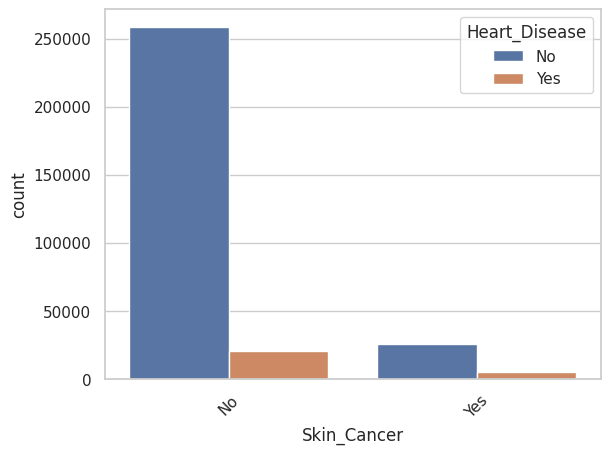

In [25]:
sns.countplot(x=df['Skin_Cancer'], hue=df['Heart_Disease'])
plt.xticks(rotation = 45)

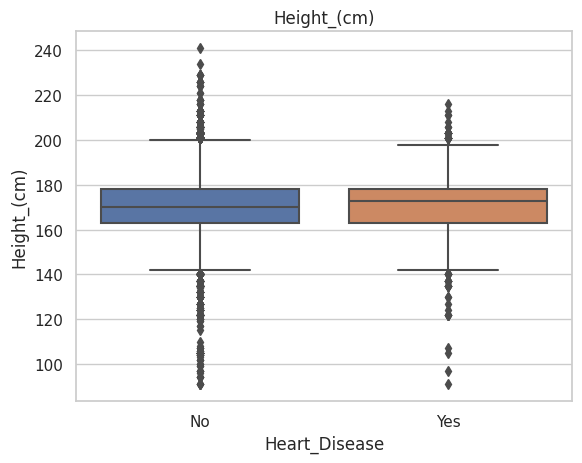

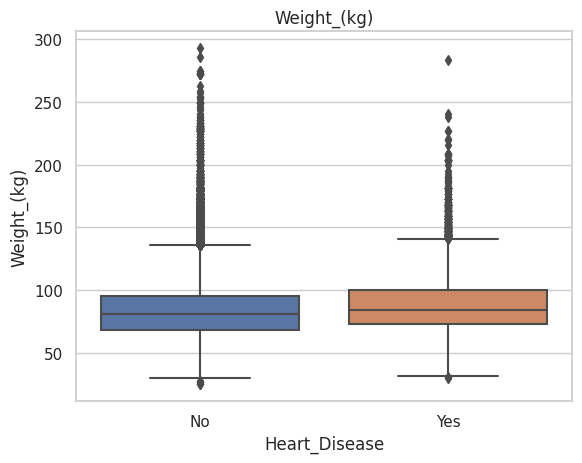

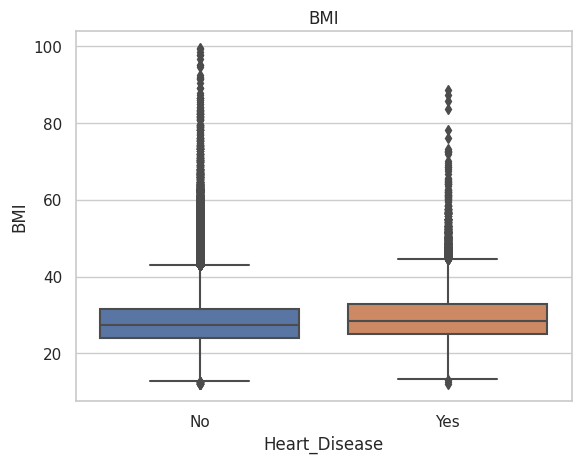

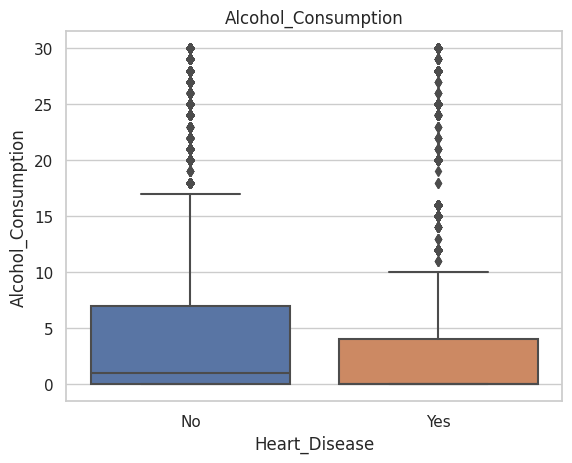

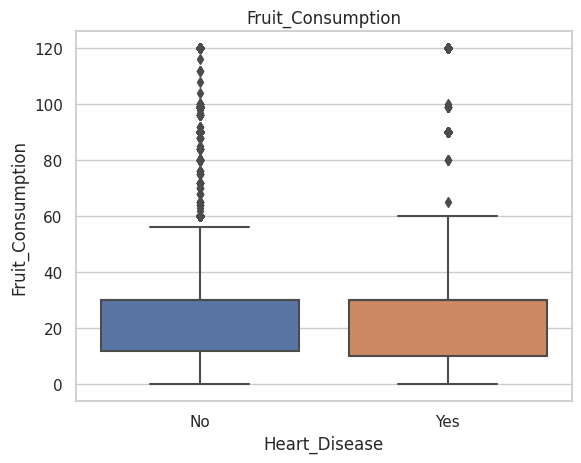

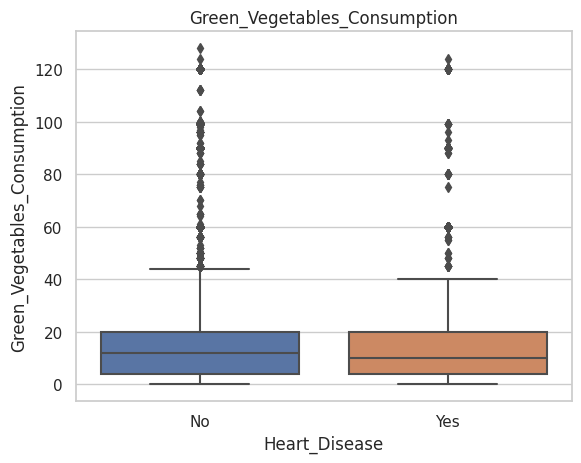

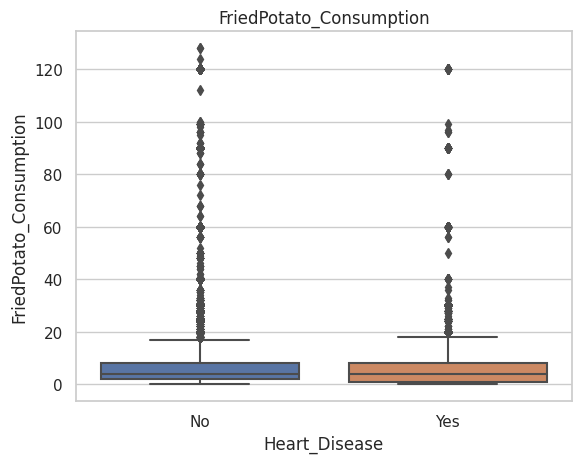

In [26]:
for col in numeric_data.columns:
    sns.boxplot(x=df['Heart_Disease'],y=df[col])
    plt.title('{}'.format(col))
    plt.show()

People who are above 55 age are more prone to cardiovacular disease. Height didnt play major role in diease but but people who are over weight and have greater BMI index are affecting to this disease. Eating fruits ans veggies are leads to heart disease but fried potato consumpation has slight contribution get heart disease. DEpression of human being doest have much role to get cardio as per this dataset. small amoount of people are aftected by cardio when they have diabetics and people who smoke have chances cardio

In this dataset Only cardio part is analyzed and other variable are treated as independent variable to heart disease.

Text(0.5, 1.0, 'Correlation between variables')

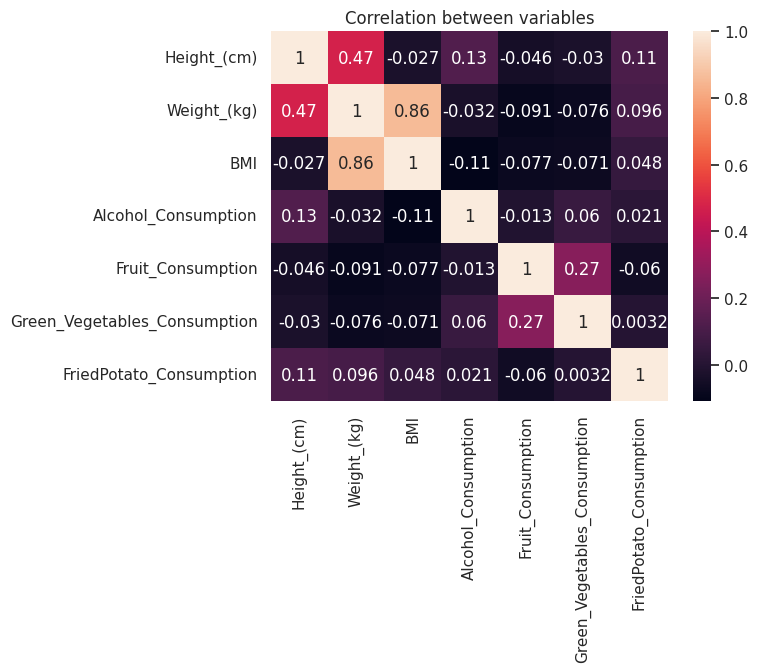

In [27]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)
plt.title("Correlation between variables")

In this correleation matrix correlation between variables are less some have negative and some have positive correlation. BMI and weight are highly correlated so we need to either drop any one column

##Encoding

In [28]:
df = pd.get_dummies(df, columns=['Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Arthritis', 'Sex','Smoking_History'],drop_first=True)

In [29]:
df

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
0,Poor,Within the past 2 years,No,70-74,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0,0,0,0,0,1,0,1
1,Very Good,Within the past year,Yes,70-74,165.0,77.11,28.29,0.0,30.0,0.0,4.0,0,1,0,0,0,0,0,0
2,Very Good,Within the past year,Yes,60-64,163.0,88.45,33.47,4.0,12.0,3.0,16.0,1,0,0,0,0,0,0,0
3,Poor,Within the past year,Yes,75-79,180.0,93.44,28.73,0.0,30.0,30.0,8.0,1,1,0,0,0,0,1,0
4,Good,Within the past year,No,80+,191.0,88.45,24.37,0.0,8.0,4.0,0.0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,No,25-29,168.0,81.65,29.05,4.0,30.0,8.0,0.0,1,0,0,0,0,0,1,0
308850,Fair,Within the past 5 years,Yes,65-69,180.0,69.85,21.48,8.0,15.0,60.0,4.0,1,0,0,0,0,0,1,0
308851,Very Good,5 or more years ago,"Yes, but female told only during pregnancy",30-34,157.0,61.23,24.69,4.0,40.0,8.0,4.0,1,0,0,0,1,0,0,1
308852,Very Good,Within the past year,No,65-69,183.0,79.38,23.73,3.0,30.0,12.0,0.0,1,0,0,0,0,0,1,0


In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'])
df['General_Health'] = label_encoder.fit_transform(df['General_Health'])
df['Checkup'] = label_encoder.fit_transform(df['Checkup'])
df['Age_Category'] = label_encoder.fit_transform(df['Age_Category'])


In [31]:
#dropping weight
df.drop(columns = ['Weight_(kg)'],inplace = True)

##Standarization

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(df)

##Modelling

In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

here data has yes and no for heart disease where yes is minimum as compared to no value so dataset is imbalanced we need to first balance the dataset and do modelling to get correct accuracy.

In [34]:
df.columns

Index(['General_Health', 'Checkup', 'Diabetes', 'Age_Category', 'Height_(cm)',
       'BMI', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'Exercise_Yes', 'Heart_Disease_Yes', 'Skin_Cancer_Yes',
       'Other_Cancer_Yes', 'Depression_Yes', 'Arthritis_Yes', 'Sex_Male',
       'Smoking_History_Yes'],
      dtype='object')

SMOTE stands for Synthetic Minority Oversampling Technique,which will helps to resample the data points to balance the data set

In [35]:
X = df.drop('Heart_Disease_Yes', axis='columns').values
y = df['Heart_Disease_Yes'].values
smote = SMOTE(random_state = 42)
X_sam, y_sam = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


###Neural network

In [59]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(17,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



In [60]:
model.compile(optimizer= Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [61]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks = [early_stopping])

Epoch 1/50
11356/11356 [==============================] - 28s 2ms/step - loss: 0.5386 - accuracy: 0.7354 - val_loss: 0.5058 - val_accuracy: 0.7553
Epoch 2/50
11356/11356 [==============================] - 28s 3ms/step - loss: 0.4870 - accuracy: 0.7687 - val_loss: 0.4613 - val_accuracy: 0.7830
Epoch 3/50
11356/11356 [==============================] - 28s 2ms/step - loss: 0.4463 - accuracy: 0.7907 - val_loss: 0.4357 - val_accuracy: 0.7962
Epoch 4/50
11356/11356 [==============================] - 28s 2ms/step - loss: 0.4304 - accuracy: 0.7997 - val_loss: 0.4476 - val_accuracy: 0.7885
Epoch 5/50
11356/11356 [==============================] - 28s 2ms/step - loss: 0.4161 - accuracy: 0.8069 - val_loss: 0.4238 - val_accuracy: 0.8050
Epoch 6/50
11356/11356 [==============================] - 28s 3ms/step - loss: 0.4085 - accuracy: 0.8106 - val_loss: 0.4255 - val_accuracy: 0.7987
Epoch 7/50
11356/11356 [==============================] - 26s 2ms/step - loss: 0.4030 - accuracy: 0.8140 - val_loss: 0

In [62]:
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print("Test Accuracy:", test_accuracy)

2839/2839 [==============================] - 4s 1ms/step - loss: 0.3199 - accuracy: 0.8517
Test Accuracy: 0.8517332077026367


In [63]:
predictions = model.predict(X_test)

3549/3549 [==============================] - 5s 1ms/step


In [64]:
predictions = np.where(predictions < 0.5, 0, 1)
print(predictions)

[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


In [65]:
y_test = y_test.ravel()
predictions = predictions.ravel()

In [66]:
data = {'actual': y_test, 'predicted': predictions}
d_f = pd.DataFrame(data)

In [67]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8523962167779207


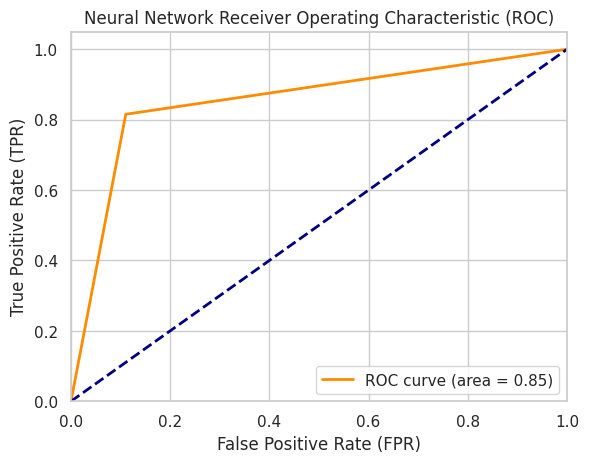

In [80]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Neural Network Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


###Logistic regression

In [54]:
log = LogisticRegression()
log.fit(X_train, y_train)
log_pred = log.predict(X_test)

log_pred_prob = log.predict_proba(X_test)
print(confusion_matrix(y_test, log_pred))
print('\n')
print(classification_report(y_test, log_pred))
print('\n')
print(roc_auc_score(y_test, log_pred_prob[:,1]))

[[40432 16269]
 [11363 45490]]


              precision    recall  f1-score   support

           0       0.78      0.71      0.75     56701
           1       0.74      0.80      0.77     56853

    accuracy                           0.76    113554
   macro avg       0.76      0.76      0.76    113554
weighted avg       0.76      0.76      0.76    113554



0.8242400209265481


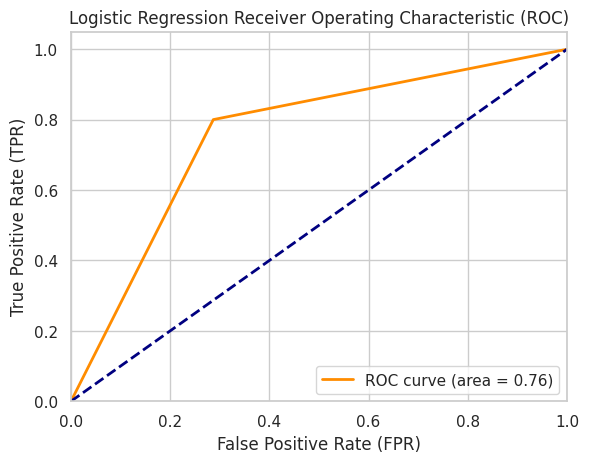

In [79]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, log_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic Regression Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

###Random forest classifier

In [56]:
random = RandomForestClassifier()
random.fit(X_train, y_train)
random_pred = random.predict(X_test)

random_pred_prob = random.predict_proba(X_test)
print(confusion_matrix(y_test, random_pred))
print('\n')
print(classification_report(y_test, random_pred))
print('\n')
print(roc_auc_score(y_test, random_pred_prob[:,1]))

[[56233   468]
 [ 4671 52182]]


              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56701
           1       0.99      0.92      0.95     56853

    accuracy                           0.95    113554
   macro avg       0.96      0.95      0.95    113554
weighted avg       0.96      0.95      0.95    113554



0.9847528121421749


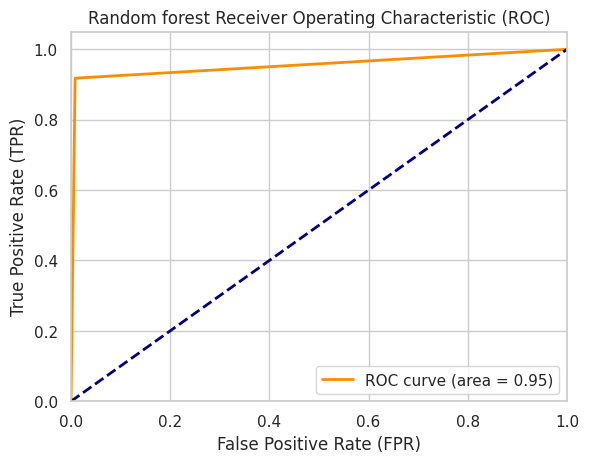

In [78]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, random_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Random forest Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [71]:
models = ['Logistic Regression', 'Random Forest','Neural_Network' ]
models = pd.DataFrame(models, columns=['model'])
models['accuracy'] = [accuracy_score(y_test, log_pred),
                      accuracy_score(y_test, random_pred),
                      accuracy_score(y_test, predictions),
                      ]

In [72]:
models

,model,accuracy
0,Logistic Regression,0.756662
1,Random Forest,0.954744
2,Neural_Network,0.852396


Logistic Regression, Random forest and Neural network  performed well. It can able to predict the cardio vascular disease and get accuracy above 0.7. Out of these three Randm foreset accuracy was good